In [3]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:


import pandas as pd
get_ipython().run_line_magic('matplotlib', 'inline')
from mpl_toolkits import mplot3d

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

#df = pd.read_csv("../DataFiles/housing.data",delim_whitespace=True, header=None, names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
USAhousing = pd.read_csv("../DataFiles/USA_Housing.csv")
samples, columns = USAhousing.shape
features = columns -1
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']
print("Samples: ",samples, "   Features + y: ",columns)
USAhousing.head(7)


Samples:  5000    Features + y:  7


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."


In [4]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [5]:
def get_bin(rangex,valuex):
    for i, rang in enumerate(rangex):
        if (valuex) <= (rang):
            return i
    

In [6]:
def get_y_mean(y, rangey):
    for i in rangey:
       
        if y < i:
            return i

In [7]:
def get_y(array,rangey):
    total = np.sum(array)
    #print("Total ",total)
    prob = np.zeros((len(array)))
    if total != 0:
        prob = (array/total) 
        #print("Array prob", prob)
        prob = prob*rangey
        #print("value *rangey ",value)
    y_mean = np.sum(prob)
    #print("Prob total: ", prob )
    #y_mean = get_y_mean(prob, rangey)
    
    return(y_mean)

In [8]:
array = np.arange(1,6,1)
print("original",array)
rangey = np.arange(0,300,60)
print("rangey ",rangey)
t = array/0.5

c = get_y(array, rangey)



original [1 2 3 4 5]
rangey  [  0  60 120 180 240]


In [9]:
x = t*rangey

sumx = np.sum(x)
print("divide total",t)
print("result *rangey",x)
print("rangey ",rangey)
print("sumtotal ",sumx)

divide total [ 2.  4.  6.  8. 10.]
result *rangey [   0.  240.  720. 1440. 2400.]
rangey  [  0  60 120 180 240]
sumtotal  4800.0


In [10]:
def create_samples(x,newpoints=1000):
    #newx = np.random.uniform(np.min(x),np.max(x),newpoints)
    newx = np.linspace(np.min(x), np.max(x), num=newpoints)
    newx = np.around(newx,4)
    #newx = np.concatenate((x,newx))
    return newx

In [11]:
def create_model_hist(x1,x2, y,bins = 10):
    minx1,max1 = np.min(x1), np.max(x1)
    minx2,max2 = np.min(x2), np.max(x2)
    miny,maxy = np.min(y), np.max(y)
    stepx1, stepx2, stepy = np.ptp(x1)/bins, np.ptp(x2)/bins, np.ptp(y)/bins
    
    rangex1, rangex2, rangey = np.arange(minx1+stepx1, max1+stepx1, stepx1), np.arange(minx2+stepx2, max2+stepx2, stepx2), np.arange(miny+stepy,maxy+stepx2,stepy)
    rangex1, rangex2, rangey = np.around(rangex1,4),np.around(rangex2,4), np.around(rangey,4)
    #print ("rango y",rangey)
    #print ("rango x2",rangex2)
    out = np.zeros((bins,bins,bins))
      
    for i,value in enumerate(zip(x1,x2)):
        
        binx = get_bin(rangex1,value[0])
        
        binx2 = get_bin(rangex2,value[1])
        outy = y[i]
        biny = get_bin(rangey,outy)
        
        
        out[binx,binx2,biny]+=1
        
    rangey = np.arange((miny+stepy+miny)/2,(maxy+1),stepy)
    print("Range y: ",rangey.shape)
    model = np.zeros((bins,bins))
    
    for i in range(0,bins):
        for j in range(0,bins):
            col = out[i,j,:] 
            #print("col ",col)
           
            y_mean = get_y(col,rangey)
            
            
            model[i][j] = y_mean
            
   
    print("unique model: ", np.unique(model).shape)
    
    return list((model, rangex1,rangex2,rangey))

In [27]:
def build_model(model, x1,x2):    
    newy = np.zeros((x1.shape[0],x2.shape[0]))
    y = model[0]
    
    rangex1 = model[1]
    rangex2 = model[2]
    for i in range(x1.shape[0]):
        for j in range(x2.shape[0]):
            binx = get_bin(rangex1,x1[i])
            print("x1",binx)
            binx2 = get_bin(rangex2, x2[i])
            print("x2",binx2)
            newy[i,j] = y[binx][binx2]
                        
    return newy


In [28]:
def plot_hpi(x="Avg. Area House Age", x2="Area Population", num_points = 100):
    zdata = y[0:num_points]
    xdata = X[x].iloc[0:num_points,]
    ydata = X[x2].iloc[0:num_points,]
    fig = plt.figure(figsize=(12,12))
    ax = plt.axes(projection='3d')
    ax.scatter3D(xdata, ydata, zdata, cmap='Greens');
    ax.set_xlabel(x)
    ax.set_ylabel(x2,labelpad=0.9)
    ax.set_zlabel("HPI")
    return ax


In [29]:

def plot_hpi_regression(X,Y,Z):
    num_points = 100
    zdata = Z#y[0:num_points]
    xdata = X#X[0:num_points,]
    ydata = Y#Y[0:num_points,]

    

    fig = plt.figure(figsize=(12,12))
    ax = fig.gca(projection='3d')
    
    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.summer,
                               linewidth=0.2, antialiased=False)
    
    #ax.scatter3D(xdata, ydata, zdata, cmap='Greens');
   
    plt.show()


In [30]:
def plot_hpi_regression2(X,Y,Z):
    

    fig = plt.figure(figsize=(12,12))
    ax = fig.gca(projection='3d')
    
    
    X, Y = np.meshgrid(X, Y)
    
    # Plot the surface.
    # surf = ax.plot_surface(X, Y, Z,
    #                            linewidth=0.2, antialiased=True)
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                               linewidth=0.3, antialiased=False)
    
   
    plt.show()


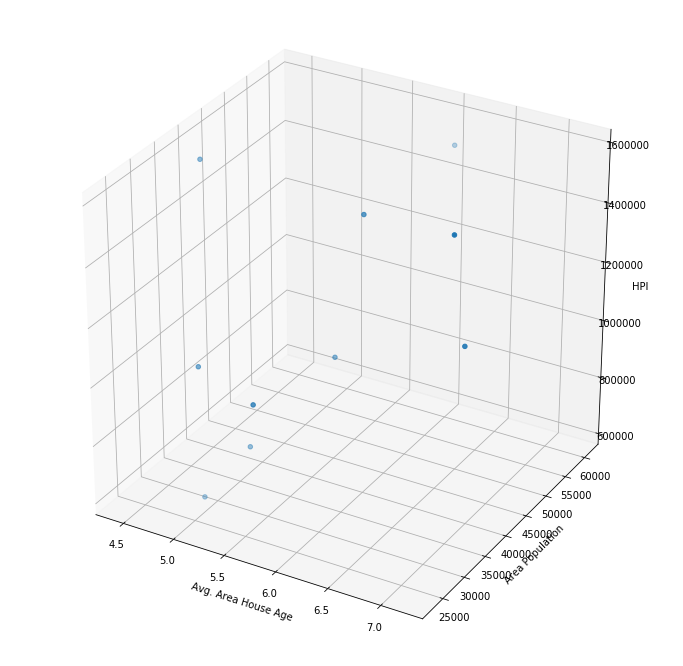

In [31]:
plot_h = plot_hpi(num_points=10)

In [32]:
np.diff(model[3])

array([245312.69362514, 245312.69362514, 245312.69362514, 245312.69362514,
       245312.69362514, 245312.69362514, 245312.69362514, 245312.69362514,
       245312.69362514])

In [41]:
x1 = X['Avg. Area House Age']
x1 = np.array(x1)

x2 = X['Area Population']
ycopy = y.copy()

model = create_model_hist(x1,x2,ycopy)


Range y:  (10,)
unique model:  (70,)


In [42]:
newx1 = create_samples(x1,newpoints=100)
newx2 = create_samples(x2,newpoints=100)
print(newx1.shape,newx1.shape)

(100,) (100,)


In [43]:
newy = build_model(model,newx1,newx2)
print("shape newy", newy.shape, " unique ",np.unique(newy).shape)

x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0


x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 0
x2 0
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1


x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 1
x2 1
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2


x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2
x2 2
x1 2


x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 3
x2 3
x1 4
x2 4
x1 4
x2 4
x1 4
x2 4
x1 4
x2 4
x1 4
x2 4
x1 4


x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5


x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 5
x2 5
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6


x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 6
x2 6
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7


x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 7
x2 7
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8


x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 8
x2 8
x1 9
x2 9
x1 9
x2 9
x1 9
x2 9
x1 9


In [37]:
model[2]

array([ 7117.521 , 14062.4312, 21007.3415, 27952.2518, 34897.162 ,
       41842.0723, 48786.9826, 55731.8928, 62676.8031, 69621.7134])

In [38]:
model[0]

array([[      0.        ,  383907.698361  ,  383907.698361  ,
         629220.39198614,  629220.39198614, 1058517.60583014,
         813204.912205  ,  997189.43242385,       0.        ,
              0.        ],
       [      0.        ,       0.        ,  629220.39198614,
         767208.78215028,  823426.27443938,  946082.62125195,
         981857.38907228,  956303.98348633, 1242502.126049  ,
        1119845.77923642],
       [      0.        ,  751876.73879871,  746970.48492621,
         792762.18773624,  892420.46952145, 1011619.59087239,
        1089601.74851552, 1179059.18804249, 1406043.92179909,
        1446929.37073661],
       [ 261251.35154843,  776408.00816123,  809977.11360467,
         908499.45857476, 1005202.15859754, 1117898.85309654,
        1242502.126049  , 1267033.39541151, 1558826.38888141,
        1733127.51329928],
       [      0.        ,  839488.41509341,  861449.74195128,
        1029730.91219045, 1116826.54608412, 1223315.65839116,
        1325270.22999569

In [39]:
newx1

array([2.6443, 2.7137, 2.7832, 2.8526, 2.9221, 2.9915, 3.061 , 3.1304,
       3.1998, 3.2693, 3.3387, 3.4082, 3.4776, 3.5471, 3.6165, 3.6859,
       3.7554, 3.8248, 3.8943, 3.9637, 4.0331, 4.1026, 4.172 , 4.2415,
       4.3109, 4.3804, 4.4498, 4.5192, 4.5887, 4.6581, 4.7276, 4.797 ,
       4.8665, 4.9359, 5.0053, 5.0748, 5.1442, 5.2137, 5.2831, 5.3526,
       5.422 , 5.4914, 5.5609, 5.6303, 5.6998, 5.7692, 5.8386, 5.9081,
       5.9775, 6.047 , 6.1164, 6.1859, 6.2553, 6.3247, 6.3942, 6.4636,
       6.5331, 6.6025, 6.672 , 6.7414, 6.8108, 6.8803, 6.9497, 7.0192,
       7.0886, 7.1581, 7.2275, 7.2969, 7.3664, 7.4358, 7.5053, 7.5747,
       7.6441, 7.7136, 7.783 , 7.8525, 7.9219, 7.9914, 8.0608, 8.1302,
       8.1997, 8.2691, 8.3386, 8.408 , 8.4775, 8.5469, 8.6163, 8.6858,
       8.7552, 8.8247, 8.8941, 8.9635, 9.033 , 9.1024, 9.1719, 9.2413,
       9.3108, 9.3802, 9.4496, 9.5191])

In [35]:
get_bin(model[1],newx1[99])

9

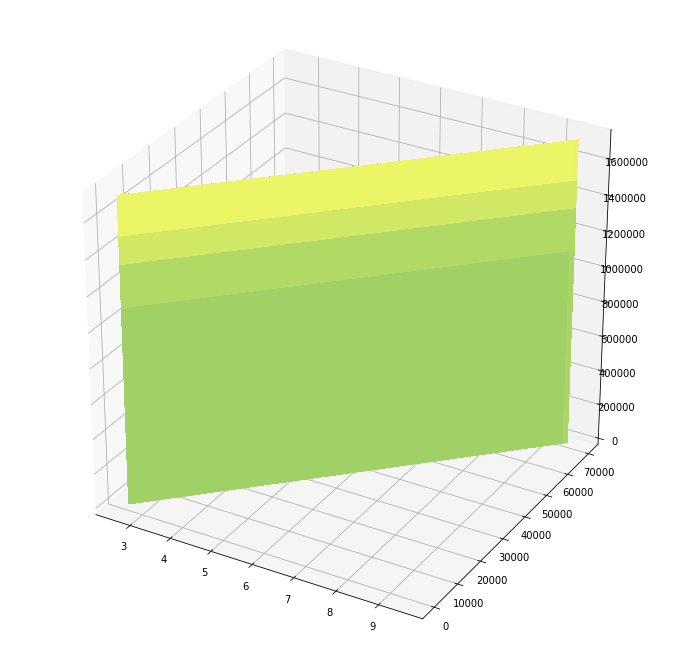

In [40]:
plot_hpi_regression(newx1,newx2,newy)